In [1]:
import numpy as np
import xml.etree.ElementTree as ET
import random
import json
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

In [2]:
def read_content(xml_file: str):

    tree = ET.parse(xml_file)
    root = tree.getroot()

    box_list = []
    type_list = []

    for obj in root.iter('object'):

        ymin, xmin, ymax, xmax = None, None, None, None

        ymin = int(obj.find("bndbox/ymin").text)
        xmin = int(obj.find("bndbox/xmin").text)
        ymax = int(obj.find("bndbox/ymax").text)
        xmax = int(obj.find("bndbox/xmax").text)

        name = obj.find("name").text
        type = 0
        if name == 'without_mask':
            type = 0
        if name == 'with_mask':
            type = 1
        if name == 'mask_weared_incorrect':
            type = 2
        
        type_list.append(type)
        box_list.append([xmin, ymin, xmax, ymax])

    return type_list, box_list

In [3]:
allTypes = []
allBoxes = []
for i in range(0,853):
    types, boxes = read_content("Data/facemask_data/annotations/maksssksksss{}.xml".format(i))
    allTypes.append(types)
    allBoxes.append(boxes)


In [4]:
imgs = []
for i in range(0,853):
    img = mpimg.imread("Data/facemask_data/images/maksssksksss{}.png".format(i))
    imgs.append(img[:,:,:3])

In [6]:
for i,img in enumerate(imgs):
    minD = min(img.shape[0],img.shape[1])
    dsize = (img.shape[1]*299//minD,img.shape[0]*299//minD) #cv2 perceives second element as y, plt opposite
    allBoxes[i]= [[j*299//minD for j in box] for box in allBoxes[i]]
    imgs[i] = cv2.resize(img,dsize)


(299, 418, 3)
[[64, 85, 89, 116], [151, 81, 184, 117], [265, 73, 294, 115]]
(467, 653, 3)
tf.Tensor(
[[ 99. 132. 139. 181.]
 [235. 126. 287. 182.]
 [414. 114. 459. 179.]], shape=(3, 4), dtype=float32)


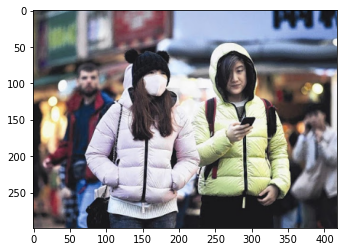

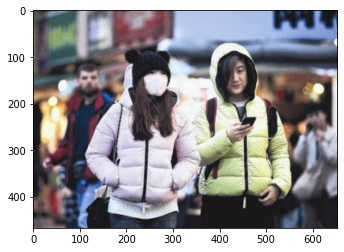

In [7]:
import tensorflow as tf
img = tf.convert_to_tensor(imgs[0])
boxes = tf.convert_to_tensor(allBoxes[0])
rand_scale = tf.random.uniform(shape=[],minval=0.5,maxval=2.0)
target = (tf.floor(rand_scale*tf.cast(tf.shape(img)[0],tf.float32)),tf.floor(rand_scale*tf.cast(tf.shape(img)[1],tf.float32)))
img = tf.image.resize(img,size=target)
boxes = tf.floor(rand_scale*tf.cast(boxes,tf.float32))

print(imgs[0].shape)
plt.figure()
plt.imshow(imgs[0])
print(allBoxes[0])

print(img.shape)
plt.figure()
plt.imshow(img)
print(boxes)


In [8]:
np.save('Data/imgs_train.npy',imgs[:650])
np.save('Data/imgs_val.npy',imgs[650:750])
np.save('Data/imgs_test.npy',imgs[750:])

/Users/michaelhyh/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [9]:
with open('Data/data_boxes_train.txt','w') as of:
    json.dump(allBoxes[:650],of)
with open('Data/data_boxes_val.txt','w') as of:
    json.dump(allBoxes[650:750],of)
with open('Data/data_boxes_test.txt','w') as of:
    json.dump(allBoxes[750:],of)

In [5]:
with open('Data/data_types_train.txt','w') as of:
    json.dump(allTypes[:650],of)
with open('Data/data_types_val.txt','w') as of:
    json.dump(allTypes[650:750],of)
with open('Data/data_types_test.txt','w') as of:
    json.dump(allTypes[750:],of)